## Analisis de Ingenieria de Caracteristicas

Aqui analizaremos a detalle sobre, los datos duplicados, nulos, atipicos, faltantees, etc. Para poder entenderlos y asi saber que debemos hacer con ellos

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
import missingno
import pyreadr
import session_info
import upsetplot
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline
sns.set(style="darkgrid")


import warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
%run extenciones-datos-faltantes.ipynb

This dataset contains details of 1000 customers who intend to buy a car, considering their annual salaries.

Columns:

User ID

Gender

Age

Annual Salary

Purchase Decision (No = 0; Yes = 1)

In [6]:
data = pd.read_csv("D:/Repositorio/Proyecto_ Venta de autos/Data_procecced/car_data.csv")
data.head(5)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [9]:
data.shape

(1000, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [11]:
data.describe(include="all")

,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,516,NaN,NaN,NaN
mean,500.500000,NaN,40.106000,72689.000000,0.402000
std,288.819436,NaN,10.707073,34488.341867,0.490547
min,1.000000,NaN,18.000000,15000.000000,0.000000
25%,250.750000,NaN,32.000000,46375.000000,0.000000
50%,500.500000,NaN,40.000000,72000.000000,0.000000
75%,750.250000,NaN,48.000000,90000.000000,1.000000


In [13]:
data.dtypes.value_counts()

int64     4
object    1
Name: count, dtype: int64

In [14]:
col_num = []
col_cat = []
for i in data.columns:
    if data[i].dtypes == "int64":
        col_num.append(i)
    else:
        col_cat.append(i)

In [15]:
col_num

['User ID', 'Age', 'AnnualSalary', 'Purchased']

In [16]:
col_cat

['Gender']

### Datos duplicados

In [17]:
data.duplicated().any()

False

In [20]:
data.duplicated().sum()

0

### Datos nulos

In [21]:
valores_nulos = data.isnull().sum()
print(f"Los valores faltantes por columna son:\n{valores_nulos}")

Los valores faltantes por columna son:
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


In [22]:
data.missing.number_missing()

0

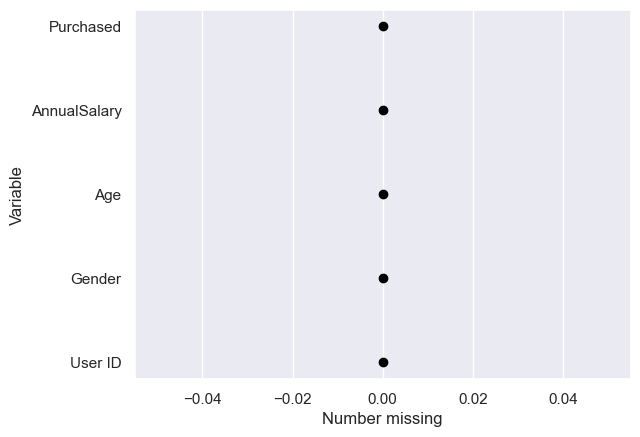

In [23]:
data.missing.missing_variable_plot()

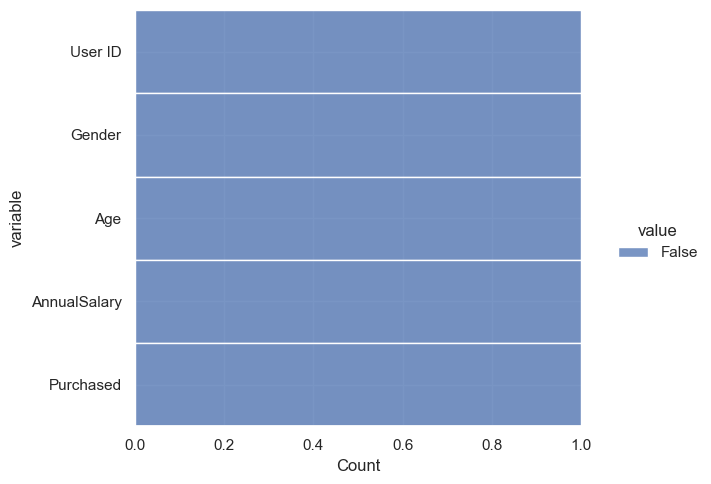

In [24]:
data.isnull().melt().pipe(
    lambda data: (
        sns.displot(data, y="variable", hue="value", multiple="fill", aspect=1.25)
    )
)
plt.show()

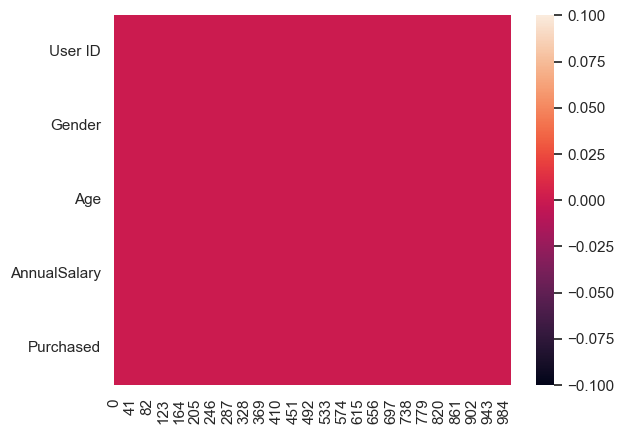

In [25]:
data.isnull().transpose().pipe(lambda data: (sns.heatmap(data=data)))
plt.show()

In [26]:
data.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,User ID,0,1000,0.0
1,Gender,0,1000,0.0
2,Age,0,1000,0.0
3,AnnualSalary,0,1000,0.0
4,Purchased,0,1000,0.0


In [27]:
data.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,5,100.0


### Datos atipicos

In [31]:
data_numeric = data.select_dtypes(include=["float64", "int64"])
q1 = data_numeric.quantile(0.25)
q3 = data_numeric.quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

outiliers = (data_numeric<limite_inferior) | (data_numeric>limite_superior)
print(f"los valores atipicos por columna son: \n {outiliers.sum()}")

los valores atipicos por columna son: 
 User ID         0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


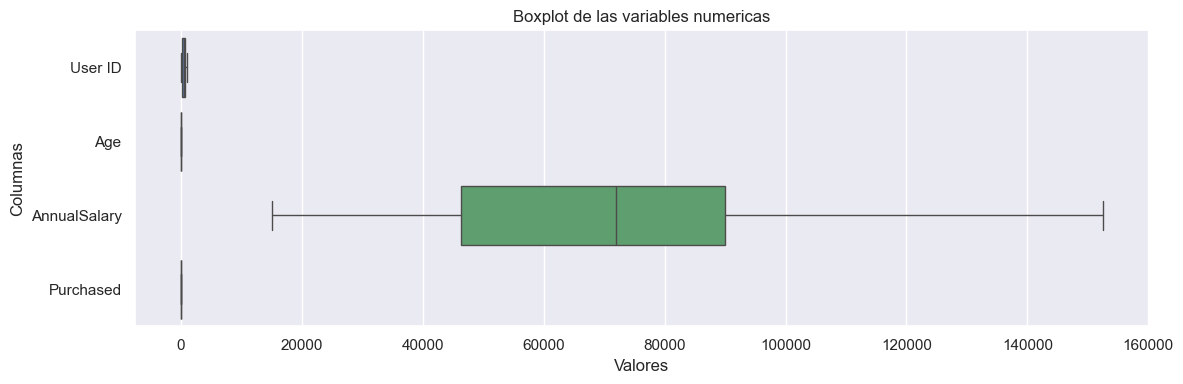

In [32]:
plt.figure(figsize=(12,4))
sns.boxplot(data=data_numeric, orient="h")
plt.title("Boxplot de las variables numericas")
plt.ylabel("Columnas")
plt.xlabel("Valores")
plt.tight_layout()
plt.show()

Conclusion:
Esta data al ser extraida de kaggle no tiene, valores duplicados, valores nulos, ni valores atipicos, por lo tanto la consideraremos una data limpia